## **Step 1** : Importing Basic Scikit Learn Libraries for Data Manipulation as well Data Visualization 

In [99]:
# Import Data Manipulation Libraries
import pandas as pd
import numpy as np

# import Data visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data Filter Warning Libraries
import warnings
warnings.filterwarnings('ignore')

# Import Data Logging Libraries
import logging
logging.basicConfig(level=logging.INFO,
                    filename='Model.log',
                    filemode= 'w',
                    format='%(asctime)s - %(levelname)s - %(message)s')

## **Step 2** : Data Uploading using Pandas Function

In [100]:
# Load the dataset
url = "https://raw.githubusercontent.com/anirudhajohare19/CementCompositeStrength_PredictionModel/refs/heads/main/concrete_data.csv"

df = pd.read_csv(url)

df.sample(frac=1)

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
609,236.0,0.0,0.0,193.0,0.0,968.0,885.0,180,24.10
761,350.0,0.0,0.0,203.0,0.0,974.0,775.0,90,31.35
38,475.0,0.0,0.0,228.0,0.0,932.0,594.0,90,42.23
859,164.0,0.0,200.0,181.0,13.0,849.0,846.0,28,15.09
770,349.0,0.0,0.0,192.0,0.0,1047.0,806.0,3,14.99
...,...,...,...,...,...,...,...,...,...
638,375.0,0.0,0.0,186.0,0.0,1038.0,758.0,28,38.21
219,166.1,0.0,163.3,176.5,4.5,1058.6,780.1,3,10.76
935,156.0,178.0,187.0,221.0,7.0,854.0,614.0,28,29.41
608,236.0,0.0,0.0,194.0,0.0,968.0,885.0,90,21.95


## **Step 3** : Doing Exploratory Data Analysis [EDA] --->

 1. Univariate Analysis

 2. Bi Variate Analysis


In [101]:
from collections import OrderedDict

stats = []

for i in df.columns:
    numerical_stats = OrderedDict ({
        'feature': i,
        'unique_values': df[i].nunique(),
        'Missing_values': df[i].isnull().sum(),
        'Min': df[i].min(),
        '25%': df[i].quantile(0.25),
        'Median': df[i].median(),
        'Max': df[i].max(), 
        'Mean': df[i].mean(),
        'mode' : df[i].mode()[0],
        'Standard Deviation': df[i].std(),
        'Variance': df[i].var(),
        'Skewness': df[i].skew(),
        'Kurtosis': df[i].kurtosis(),
        'IQR': df[i].quantile(0.75) - df[i].quantile(0.25),

        })
    
    stats.append(numerical_stats)

df_stats = pd.DataFrame(stats)

df_stats.style.background_gradient(subset=['unique_values', 'Missing_values', 'Min', '25%', 'Median', 'Max', 'Mean', 'mode', 'Standard Deviation', 'Variance', 'Skewness','Kurtosis','IQR'], cmap='coolwarm')


,feature,unique_values,Missing_values,Min,25%,Median,Max,Mean,mode,Standard Deviation,Variance,Skewness,Kurtosis,IQR
0,cement,278,0,102.000000,192.375000,272.900000,540.000000,281.167864,362.600000,104.506364,10921.580220,0.509481,-0.520652,157.625000
1,blast_furnace_slag,185,0,0.000000,0.000000,22.000000,359.400000,73.895825,0.000000,86.279342,7444.124812,0.800717,-0.508175,142.950000
2,fly_ash,156,0,0.000000,0.000000,0.000000,200.100000,54.188350,0.000000,63.997004,4095.616541,0.537354,-1.328746,118.300000
3,water,195,0,121.800000,164.900000,185.000000,247.000000,181.567282,192.000000,21.354219,456.002651,0.074628,0.122082,27.100000
4,superplasticizer,111,0,0.000000,0.000000,6.400000,32.200000,6.204660,0.000000,5.973841,35.686781,0.907203,1.411269,10.200000
5,coarse_aggregate,284,0,801.000000,932.000000,968.000000,1145.000000,972.918932,932.000000,77.753954,6045.677357,-0.040220,-0.599016,97.400000
6,fine_aggregate,302,0,594.000000,730.950000,779.500000,992.600000,773.580485,594.000000,80.175980,6428.187792,-0.253010,-0.102177,93.050000
7,age,14,0,1.000000,7.000000,28.000000,365.000000,45.662136,28.000000,63.169912,3990.437729,3.269177,12.168989,49.000000
8,concrete_compressive_strength,845,0,2.330000,23.710000,34.445000,82.600000,35.817961,33.400000,16.705742,279.081814,0.416977,-0.313725,22.425000


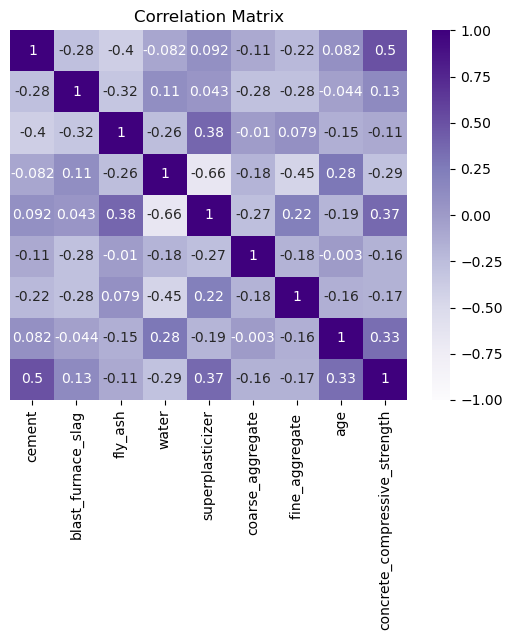

In [102]:
# Chicking Correlation Matrix
# X = Independent Variables
# Y = Dependent Variables -----> ['concrete_compressive_strength']

sns.heatmap(df.corr(), annot = True,yticklabels=False, center = 0,vmax = 1, vmin = -1 ,cmap= 'Purples')
plt.title('Correlation Matrix')
plt.show()

In [103]:
# Understanding Features and create New Features Based on Existing Features ----> Feature Engineering

df.corr()['concrete_compressive_strength']

cement                           0.497832
blast_furnace_slag               0.134829
fly_ash                         -0.105755
water                           -0.289633
superplasticizer                 0.366079
coarse_aggregate                -0.164935
fine_aggregate                  -0.167241
age                              0.328873
concrete_compressive_strength    1.000000
Name: concrete_compressive_strength, dtype: float64

In [104]:
df['composite_ratio'] = (df['cement'] + df['superplasticizer'] + df['blast_furnace_slag'])/(df['water'])
df

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength,composite_ratio
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99,3.348765
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89,3.348765
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27,2.083333
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05,2.083333
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30,1.723958
...,...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28,2.234410
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18,1.696939
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70,1.525688
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77,2.033599


In [105]:
# df.drop('Composite',axis=1, inplace=True)

In [106]:
df['Cement_to_Water_Ratio'] = df['cement']/df['water']

In [107]:
df.corr()['concrete_compressive_strength']

cement                           0.497832
blast_furnace_slag               0.134829
fly_ash                         -0.105755
water                           -0.289633
superplasticizer                 0.366079
coarse_aggregate                -0.164935
fine_aggregate                  -0.167241
age                              0.328873
concrete_compressive_strength    1.000000
composite_ratio                  0.620196
Cement_to_Water_Ratio            0.559522
Name: concrete_compressive_strength, dtype: float64

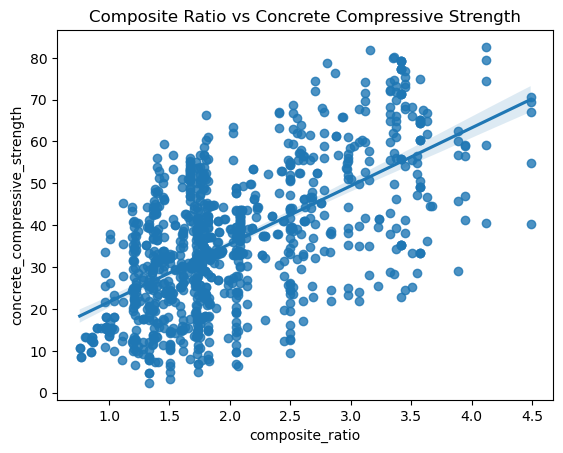

In [108]:
sns.regplot(x = df['composite_ratio'], y = df['concrete_compressive_strength'])
plt.title('Composite Ratio vs Concrete Compressive Strength')
plt.show()

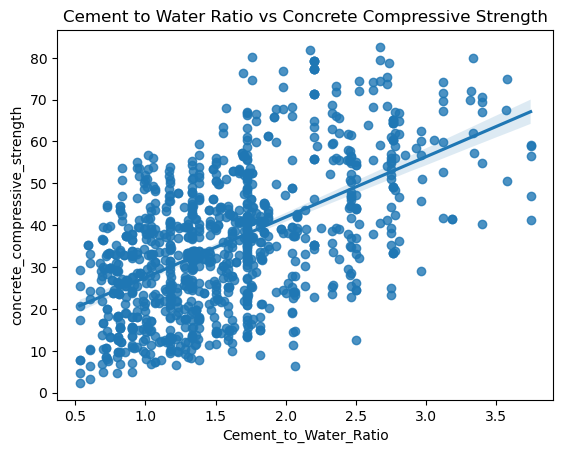

In [109]:
sns.regplot(x = df['Cement_to_Water_Ratio'], y = df['concrete_compressive_strength'])
plt.title('Cement to Water Ratio vs Concrete Compressive Strength')
plt.show()

## **Step 4** : 1. Splitting the dataset into Training and Testing Datasets. Also Using Train and Test split to Prevent data Leakage

In [112]:
from sklearn.model_selection import train_test_split

X = df.drop(columns= 'concrete_compressive_strength',axis=1)
y = df['concrete_compressive_strength']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [113]:
# Usign Scaling Technique 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [114]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()

LR.fit(X_train, y_train)
y_pred_LR = LR.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

r2_score_LR = r2_score(y_test, y_pred_LR)

r2_score_LR

0.5941935306287762